In [33]:
# %pip install openpyxl

In [34]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime
import numpy as np
import matplotlib.colors as mcolors

In [39]:
df = pd.read_excel('sunspots_data_2024-08-27T19_15_05+02_00.xlsx')
df = df.reset_index()  # make sure indexes pair with number of rows

# List of accepted sunspot types
#accepted_types = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J']
accepted_types = ['C']



In [40]:
# Mapping each letter to a color
colors = plt.cm.get_cmap('tab20', len(accepted_types))  # Choose a colormap with 20 different colors
# type_color_map = {sunspot_types[i]: colors(i) for i in range(len(sunspot_types))}

color_gradient = {
    'A': '#FF0000',  # Red
    'B': '#FF4000',
    'C': '#FF8000',
    'D': '#FFBF00',
    'E': '#FFFF00',  # Yellow
    'F': '#BFFF00',
    'G': '#80FF00',
    'H': '#40FF00',
    'J': '#8000FF'   # Purple
}

C:\Users\josia\AppData\Local\Temp\ipykernel_11532\3639458527.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(accepted_types))  # Choose a colormap with 20 different colors


In [41]:
data = dict()
dates = list()
latitudes = list()
types = list()
sunspot_types = list()



for index, row in df.iterrows():
    # print(row['date'], row['year'], row['time'], row['group nr.'], row['weighted spot count'], row['type'], row['latitude'], row['longitude'])
    date = row['date']
    latitude = row['latitude']
    type = row['type']
    num = row['group nr.']

    if date != 'nan' and latitude != 'nan' and type in accepted_types:
        try:
            dates.append(datetime(date.year, date.month, date.day))
            latitudes.append(latitude)
            sunspot_types.append(type)
        except:
            continue
        
    

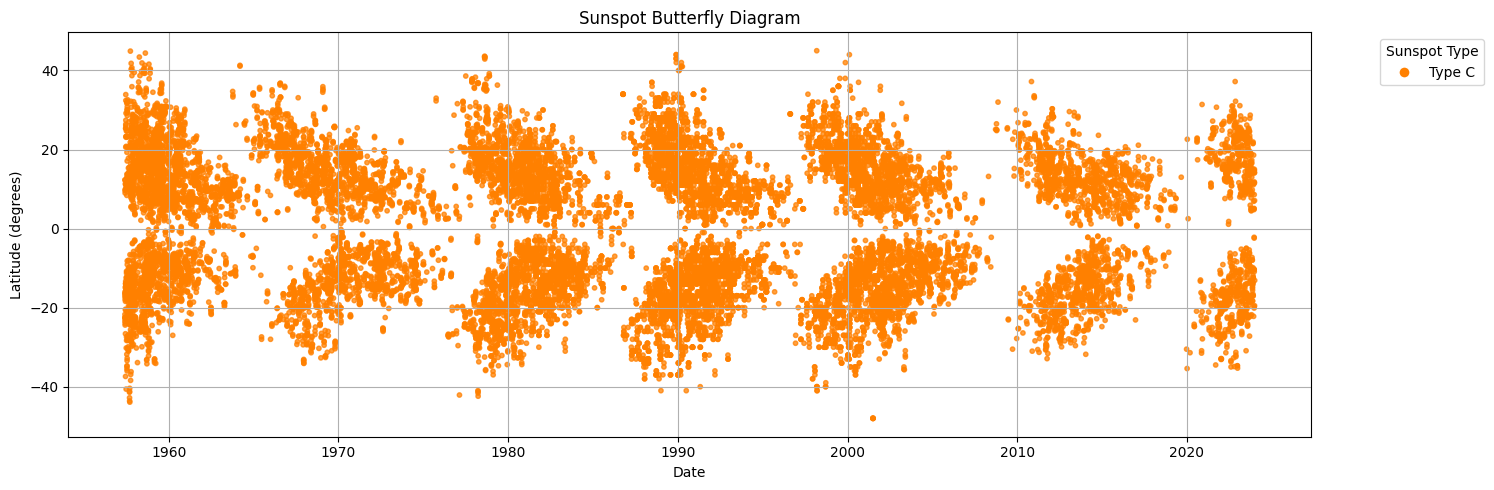

In [42]:
# Convert data to numpy arrays for easier manipulation
dates = np.array(dates)
latitudes = np.array(latitudes)
colors = [color_gradient[t] for t in sunspot_types]
# print(colors[:10])
# print(sunspot_types[:10])

plt.figure(figsize=(15, 5))

# Plot the filtered data
plt.scatter(dates, latitudes, c=colors, s=10, alpha=0.75)

# Improve x-axis formatting for dates
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))  # Major ticks every 5 years
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # Format ticks as years

# Add a custom legend showing the color mapping for each type
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_gradient[t], markersize=8, label=f'Type {t}')
           for t in accepted_types]

#plt.legend(handles=handles, title='Sunspot Type')
plt.legend(handles=handles, title='Sunspot Type', bbox_to_anchor=(1.05, 1), loc='upper left')


# Set labels and title
plt.xlabel('Date')
plt.ylabel('Latitude (degrees)')
plt.title(f'Sunspot Butterfly Diagram')

# Add grid and layout adjustments
plt.grid(True)
plt.tight_layout()
plt.show()